In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# linkage: 계층형 군집분석
# dendrogram
# fcluster : linkage로부터 얻은 값으로 군집 생성
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# 데이터 표준화
from sklearn.preprocessing import StandardScaler

# KMeans 군집분석, DBSCAN 군집분석
from sklearn.cluster import KMeans, DBSCAN


import warnings
warnings.filterwarnings('ignore')

In [6]:
ds_supervisor = pd.read_csv("./직무능력평가.csv")
ds_supervisor.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [7]:
# 데이터 표준화
scaler = StandardScaler()
ds_supervisor_scaled = scaler.fit_transform(ds_supervisor)
ds_supervisor_scaled[:5]

array([[-1.8076031 , -1.19166169, -1.92300586, -1.50494461, -0.35542617,
         1.77141034,  0.20430138],
       [-0.13647543, -0.19861028, -0.17733772, -0.20508842, -0.15977874,
        -0.18159526,  0.4020124 ],
       [ 0.53197564,  0.25972114,  1.23582221,  1.09476777,  1.11192959,
         1.15467173,  0.50086791],
       [-0.30358819, -0.27499885, -0.67610004, -0.81168798, -1.0401922 ,
         0.9490922 , -0.78425369],
       [ 1.36753948,  0.87082969,  0.23829756,  0.83479653,  0.622811  ,
         0.84630243,  0.4020124 ]])

In [10]:
# 목표변수
ds_supervisor_y = ds_supervisor_scaled[:,0]

# 설명변수
ds_supervisor_x = ds_supervisor_scaled[:,1::]

Text(0, 0.5, 'sample index')

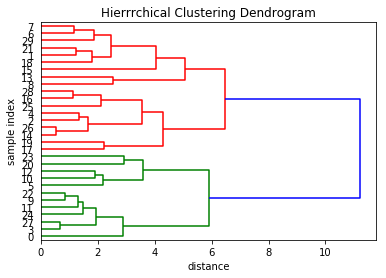

In [22]:
# 연결 : ward , 거리계산 : Euclidean
Z_ward = linkage(ds_supervisor_x , method = "ward", metric = "euclidean")

# 연결 : average, 거리 계산 : Euclidean
Z_average = linkage(ds_supervisor_x , method = "average", metric = "euclidean")

# 연결 : average , 거리계산 : minkowski
Z_Minkowski = linkage(ds_supervisor_x , method = "average", metric = "minkowski")

ax= plt.subplot(111)
dendrogram(Z_ward, leaf_font_size = 10, orientation = "right")
plt.title("Hierrrchical Clustering Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")


Text(0, 0.5, 'sample index')

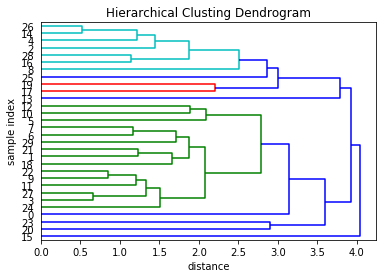

In [23]:
dendrogram(Z_average,leaf_font_size= 10, orientation="right" )
plt.title("Hierarchical Clusting Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

Text(0, 0.5, 'sample index')

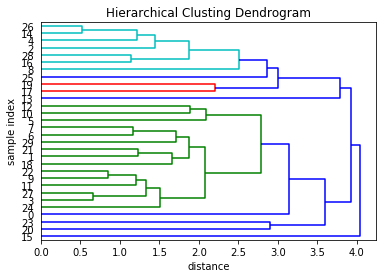

In [24]:
dendrogram(Z_Minkowski,leaf_font_size= 10, orientation="right" )
plt.title("Hierarchical Clusting Dendrogram")
plt.xlabel("distance")
plt.ylabel("sample index")

In [25]:
cluster_hierarchical = fcluster(Z=Z_ward,t=5,criterion="distance")
ds_supervisor["Cluster_hierarchical"] = cluster_hierarchical

In [26]:
ds_summary_hc = ds_supervisor.groupby("Cluster_hierarchical").agg(["min","mean","max"])
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns= level0 + "_" + level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,Cluster_hierarchical,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,43,57.429,67,51,58.857,66,30,43.571,52,...,50,51,59.429,66,74,81.143,92,33,38.571,45
1,2,40,53.200,69,37,49.400,62,33,46.800,57,...,58,43,52.000,58,49,60.000,67,25,35.000,49
2,3,50,71.889,85,58,73.889,85,54,63.333,71,...,75,55,74.333,88,74,79.000,86,46,54.667,72
3,4,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35
4,5,58,69.143,82,61,72.714,90,39,47.143,52,...,72,60,66.286,75,54,72.000,85,35,40.714,47


In [29]:
# 최대 군집 생성 갯수
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []

for n_clus in cluster_range:
    clus = KMeans(n_clus)
    clus.fit(ds_supervisor_x)
    
    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
    
ds_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error": clus_error})
ds_error.round(3)

,NumberofCluster,Error
0,1,180.000
1,2,114.083
2,3,93.354
3,4,81.421
4,5,67.298
5,6,57.046
6,7,49.967
7,8,44.044
8,9,37.726
9,10,33.518


Text(0, 0.5, 'Sum of squared distance')

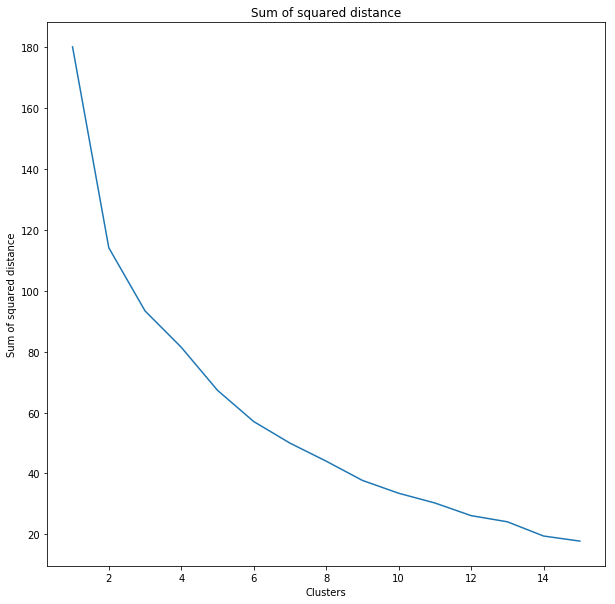

In [30]:
plt.figure(figsize=(10,10))
plt.plot(ds_error["NumberofCluster"], ds_error["Error"])
plt.title("Sum of squared distance")
plt.xlabel("Clusters")
plt.ylabel("Sum of squared distance")

In [31]:
clus = KMeans(5)
clus.fit(ds_supervisor_x)
cluster_kmeans = [ i+1 for i in clus.labels_]
ds_supervisor["ClusterKmeans"] = cluster_kmeans
ds_supervisor.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Cluster_hierarchical,ClusterKmeans
0,43,51,30,39,61,92,45,1,2
1,63,64,51,54,63,73,47,5,4
2,71,70,68,69,76,86,48,3,1
3,61,63,45,47,54,84,35,1,2
4,81,78,56,66,71,83,47,3,1


In [39]:
ds_summary_km = ds_supervisor.drop("Cluster_hierarchical", axis = 1, \
                                   inplace = False).groupby("ClusterKmeans").agg(["min", "mean","max"])

level0= ds_summary_km.columns.get_level_values(0)
level1= ds_summary_km.columns.get_level_values(1)

ds_summary_km.columns = level0 + "_" + level1
ds_summary_km.reset_index(inplace = True)
ds_summary_km.round(3)

,ClusterKmeans,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,1,65,73.556,85,60,75.222,85,46,60.889,71,...,75,55,75.556,88,74,79.778,86,46,54.000,72
1,2,43,58.875,69,51,59.250,66,30,45.250,57,...,50,51,58.875,66,63,78.875,92,25,36.875,45
2,3,40,44.333,50,37,44.000,55,33,41.333,49,...,58,43,49.000,54,49,56.667,64,33,38.667,49
3,4,50,66.625,82,53,68.750,90,39,50.625,68,...,72,58,63.875,70,54,70.500,80,34,40.625,52
4,5,68,70.000,72,82,82.500,83,72,77.500,83,...,67,59,65.000,71,77,80.000,83,31,33.000,35


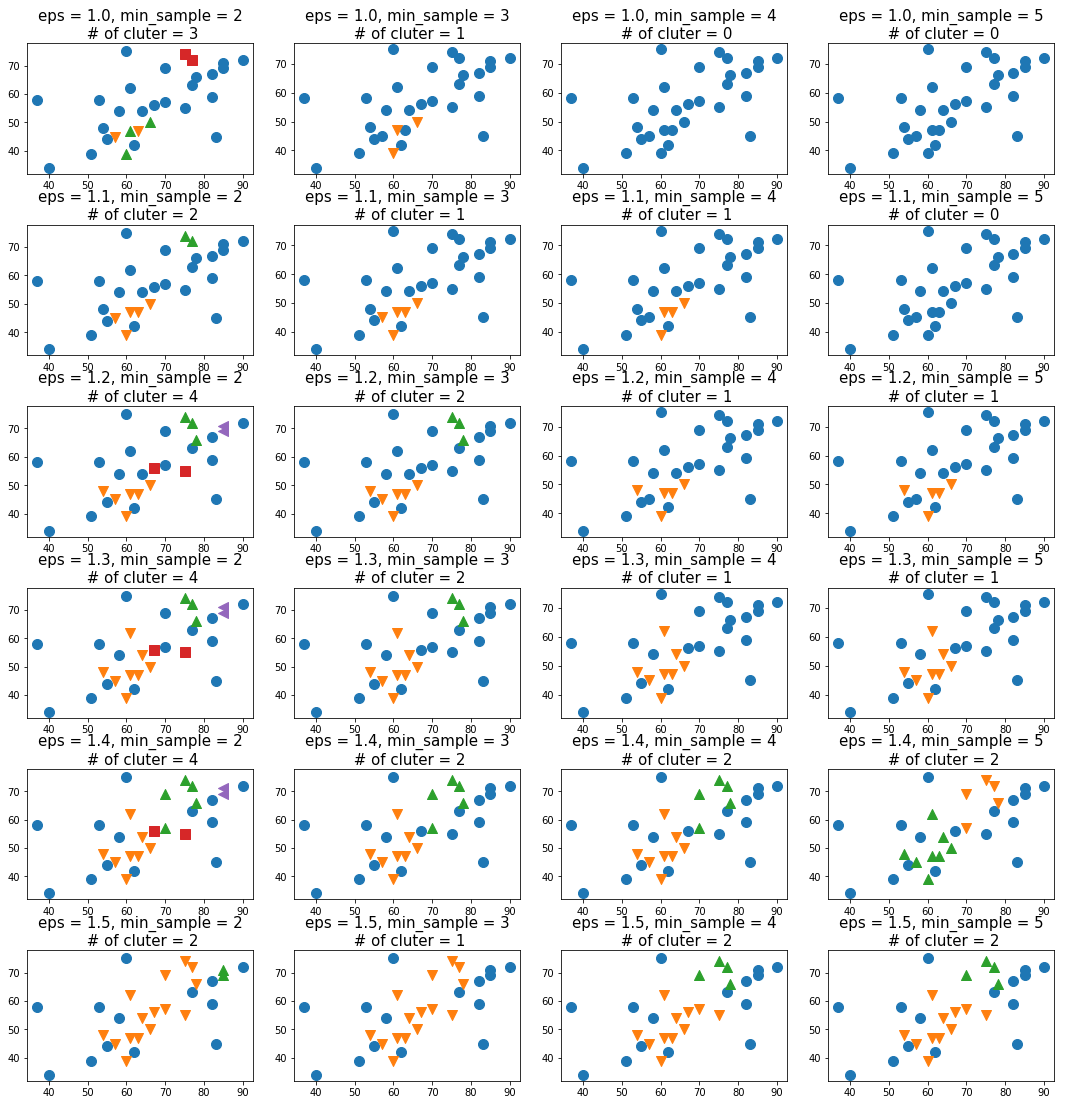

In [46]:
# X축 : DISSATIS 변수 , Y축 : CHANCE
X = ds_supervisor["DISSATIS"]
Y = ds_supervisor["CHANCE"]

# 데이터 point 그림 종류
markers = ["o","v", "^", "s","<",">","p","D"]

# eps : 1.0~ 1.5, min_sample : 2~5
para_eps = [k/10 for k in range(10,16,1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize =(15,15)) # plot갯수
fig.tight_layout(w_pad = 1 ,h_pad = 3) # plot간 간격
# enumerate() : 값의 index와 값을 순차적으로 반환

for i,eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples= min_sample, eps = eps) # dbscan 실행
        clusters = dbscan.fit_predict(ds_supervisor_x) # 예측 분류
        clusters = clusters + 1 # noise의 경우 -1 로 표기 되므로 1 씩 더하여 0으로 변환
        
        for( n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1)): #군집별 다른 그림 지정
            axes[i,j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s =100)
            axes[i,j].set_title("eps = "+ str(eps) + ", min_sample = " + str(min_sample) +\
                               "\n # of cluter = " + str(max(clusters)), fontsize =15)

In [47]:
# eps : 특정 데이터로부터 다른 데이터를 포함하는 거리 min_samples : 군집이 되기 위한 최소 데이터 수
dbscan = DBSCAN(eps = 1.4, min_samples=2 ).fit( ds_supervisor_x)

# 군집결과
cluster_dbscan = dbscan.labels_

# sklearn의 DBSCAN에서는 noise 데이터의 경우 군집이 -1로 표시되며 0번 군집부터 시작
# 다른계층형, K-means는 1번 군집부터 시작하므로 다른 군집 번호와 통일 . Noise 데이터는 0번 군집으로 표기

for( i, val) in enumerate(cluster_dbscan):
    if val < 0:
        cluster_dbscan[i] =0
    else :
        cluster_dbscan[i] = cluster_dbscan[i] +1

ds_supervisor["ClusterDBscan"] = cluster_dbscan
ds_supervisor.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Cluster_hierarchical,ClusterKmeans,ClusterDBscan
0,43,51,30,39,61,92,45,1,2,0
1,63,64,51,54,63,73,47,5,4,1
2,71,70,68,69,76,86,48,3,1,2
3,61,63,45,47,54,84,35,1,2,1
4,81,78,56,66,71,83,47,3,1,2


In [51]:
# DB 스캔 군집별 요약 통계량
ds_summary_db = ds_supervisor.drop(["Cluster_hierarchical", "ClusterKmeans"], axis = 1, inplace = False\
                                   ).groupby("ClusterDBscan").agg(["min","mean","max"])

level0= ds_summary_db.columns.get_level_values(0)
level1= ds_summary_db.columns.get_level_values(1)

ds_summary_db.columns = level0 + "_" + level1
ds_summary_db.reset_index(inplace = True)
ds_summary_db.round(3)

,ClusterDBscan,EVAL_min,EVAL_mean,EVAL_max,DISSATIS_min,DISSATIS_mean,DISSATIS_max,PRIVILEGE_min,PRIVILEGE_mean,PRIVILEGE_max,...,CHANCE_max,ADVANCE_min,ADVANCE_mean,ADVANCE_max,CRITISM_min,CRITISM_mean,CRITISM_max,PROMOTION_min,PROMOTION_mean,PROMOTION_max
0,0,40,61.00,82,37,63.846,90,30,54.385,83,...,75,43,60.154,88,49,70.615,92,25,41.923,72
1,1,48,60.75,67,54,60.750,66,42,47.250,52,...,62,51,60.500,66,73,78.625,84,33,39.125,47
2,2,65,74.40,81,70,74.000,78,46,56.400,68,...,74,71,76.200,80,77,81.800,86,46,47.200,49
3,3,58,64.50,71,67,71.000,75,42,46.000,50,...,56,66,68.000,70,66,67.000,68,35,38.000,41
4,4,74,79.50,85,85,85.000,85,64,67.500,71,...,71,77,78.000,79,74,76.500,79,55,59.000,63
